In [5]:
from keras.datasets import mnist

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

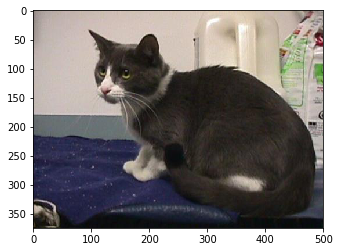

In [6]:
cat4 = cv2.imread('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS//train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [7]:
cat4.shape

(375, 500, 3)

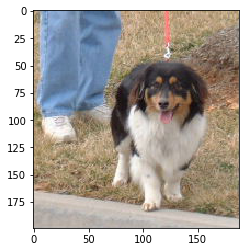

In [8]:
dog = cv2.imread('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
## some are optional, but that is a good default

image_gen = ImageDataGenerator(rotation_range= 30, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

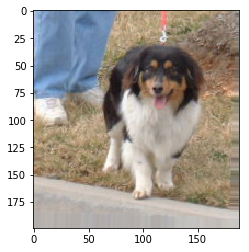

In [11]:
plt.imshow(image_gen.random_transform(dog))

In [12]:
image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [14]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # Prevents over-fitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [15]:
## Train the model

batch_size = 16
train_img_gen=image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/train',
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')


Found 18743 images belonging to 2 classes.


In [16]:
batch_size = 16
test_img_gen=image_gen.flow_from_directory('Computer-Vision-with-Python/CATS_DOGS/CATS_DOGS/test',
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 6251 images belonging to 2 classes.


In [17]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [20]:
from keras.models import load_model

In [21]:
new_model = load_model('Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [31]:
# predicting an image we haven't seen before

animal_file1 = 'siv1.jpg'
animal_file2 = 'nitzan1.jpg'
animal_file3 = 'noa2.jpg'
animal_file4 = 'ron1.jpg'
Shira_pic = 'Noa.jpg'

from keras.preprocessing import image

In [23]:
def predict_animal(dog_img):
    dog_img = image.load_img(dog_img, target_size=(150,150))
    plt.imshow(dog_img)

    dog_img = image.img_to_array(dog_img)

    dog_img.shape
    dog_img = np.expand_dims(dog_img,axis=0)
    dog_img.shape
    dog_img = dog_img/255
    res1= model.predict_classes(dog_img)
    if res1==0:
        res1= "Cat"
    else:
        res1 = "Dog"
    res2=model.predict(dog_img)
    print(res1, res2)



Cat [[0.47896805]]


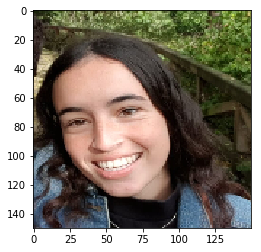

In [32]:
predict_animal(animal_file1)

Cat [[0.4473176]]


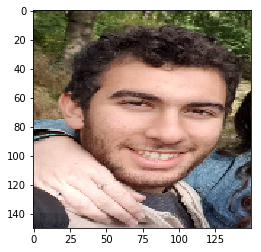

In [26]:
predict_animal(animal_file2)

Cat [[0.45435375]]


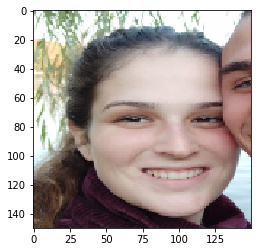

In [33]:
predict_animal(animal_file3)

Cat [[0.43957534]]


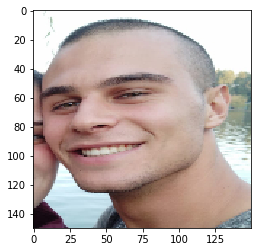

In [34]:
predict_animal(animal_file4)

Cat [[0.47006264]]


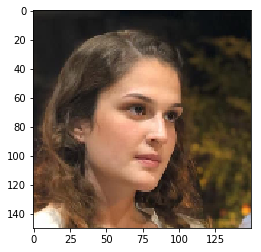

In [27]:
predict_animal(Shira_pic])